<h1>Assignment 5: programming</h1>

This is the programming part of Assignment 5. When you're done, select "Restart and run all" in the Kernel menu, and make sure your code behaves as you expect. There is a theoretical part of the assignment also, found in the Handouts folder on CoCalc, which must be handed in at the <i>start</i> of class on Wednesday, October 30.

First, run the following code to import packages that we'll need.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

<h2>1. Bisection method</h2>

<h4>a.</h4>
Complete the function below to implement the bisection method.

In [2]:
def bisect(f,a,b,tol,max_iter):
    # f is the name of a function, defined elsewhere, whose root we want to find
    # [a,b] is the initial interval. return an error message unless f(a)*f(b)<0
    # if c=(b-a)/2 < tol, or if the number of iterations reaches max_iter, do the following
    #   1. print the forward error bound
    #   2. return c
    if (f(a)==0):
        return a
    if (f(b)==0):
        return b
    if (f(a)*f(b)>0):
        return "ERROR: f(a) and f(b) have the same sign"
    for iter in range(0,max_iter):
        if ((b-a)/2 < tol):
            break
        c = (a+b)/2
        if(f(c)==0):
            return c
        if(f(a)*f(c)<0):
            b = c
        else:
            a = c
    print("The final interval [%.13f,%.13f] contains a root" %(a ,b))
    return (a+b)/2
    # your code here

To test your function, make sure the following command finds the correct root of $\cos x$ for $x\in[1,2]$.

In [3]:
bisect(np.cos,1,2,1e-12,100)

The final interval [1.5707963267942,1.5707963267960] contains a root


1.5707963267950618

<h4>b.</h4> Consider the following matrix, which is a function of $x$.
\[ M(x)=\begin{bmatrix}x&-120&240&-140\\-120&1200&-2700&1680\\240&-2700&6480&-4200\\-140&1680&-4200&2800\end{bmatrix} \]
The following function <tt>h(x)</tt> returns the minimum eigenvalue of $M(x)$.

In [4]:
from scipy.linalg import invhilbert
def h(x): 
    M = invhilbert(4)
    M[0][0] = x
    return np.min(np.linalg.eig(M)[0])

Use your <tt>bisect</tt> function to find the value of $x$ such that the minimum eigenvalue of $M(x)$ is equal to 3. Make sure the forward error of your final result is no larger than 1e-8. 

In [5]:
def g(x):
    return h(x)-3

To record your answer, assign the following variable.

In [6]:
xM = bisect(g,-10000,10000,1e-8,1000)

The final interval [22.5501999557309,22.5501999739208] contains a root


<h2>2. Fixed-point iteration</h2>

<h4>a.</h4>
To find the solution to $x=\cos x$, implement fixed point iteration with $g(x)=\cos x$. Use the initial guess $x_0=0.5$, and stop when the backward error is less than 1e-8. On each step, print the step number and the current value of $x_n$.

In [7]:
def g(x):
    return np.cos(x)
x0 = 0.5
x1 = g(x0)
cnt = 0
while (np.abs(x1 - x0) >= 1e-8):
    print("Step: %d \t xn = %.9f"%(cnt,x0))
    x0 = x1
    x1 = g(x0)
    cnt += 1
print("Step: %d \t xn = %.9f"%(cnt,x1))



Step: 0 	 xn = 0.500000000
Step: 1 	 xn = 0.877582562
Step: 2 	 xn = 0.639012494
Step: 3 	 xn = 0.802685101
Step: 4 	 xn = 0.694778027
Step: 5 	 xn = 0.768195831
Step: 6 	 xn = 0.719165446
Step: 7 	 xn = 0.752355759
Step: 8 	 xn = 0.730081063
Step: 9 	 xn = 0.745120341
Step: 10 	 xn = 0.735006309
Step: 11 	 xn = 0.741826523
Step: 12 	 xn = 0.737235725
Step: 13 	 xn = 0.740329652
Step: 14 	 xn = 0.738246238
Step: 15 	 xn = 0.739649963
Step: 16 	 xn = 0.738704539
Step: 17 	 xn = 0.739341452
Step: 18 	 xn = 0.738912449
Step: 19 	 xn = 0.739201444
Step: 20 	 xn = 0.739006780
Step: 21 	 xn = 0.739137911
Step: 22 	 xn = 0.739049581
Step: 23 	 xn = 0.739109081
Step: 24 	 xn = 0.739069001
Step: 25 	 xn = 0.739096000
Step: 26 	 xn = 0.739077813
Step: 27 	 xn = 0.739090064
Step: 28 	 xn = 0.739081812
Step: 29 	 xn = 0.739087371
Step: 30 	 xn = 0.739083626
Step: 31 	 xn = 0.739086148
Step: 32 	 xn = 0.739084449
Step: 33 	 xn = 0.739085594
Step: 34 	 xn = 0.739084823
Step: 35 	 xn = 0.739085342
St

<h4>b.</h4>
Starting from $x_0=0.5$, repeat the first 15 steps of part a. Taking the final estimate from part a as the exact answer, compute and save $e_n$ at each step. Plot $e_n$ versus $n$ for $n=0,1,\ldots,15$, choosing linear or logarithmic axis scales as decided in problem 2 of the theory assignment.

0.7390851372357778


Text(0, 0.5, 'Error')

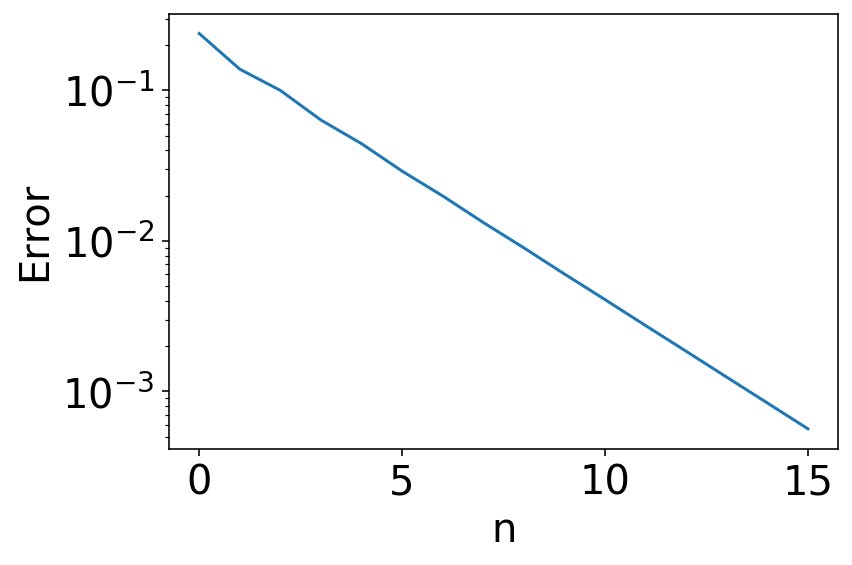

In [8]:
print(x1)
x0 = 0.5
y = np.zeros(16)
x = np.zeros(16)
for i in range (len(x)):
    y[i] = np.abs(x1-x0)
    x[i] = i
    x0 = g(x0)
    
plt.figure()
#plt.xscale('log')
plt.yscale('log')
plt.plot(x,y)
plt.xlabel('n')
plt.ylabel('Error')

<h2>3. Newton's method</h2>

On part 3c of the theory assignment you derived the iterated function $g(x)$ that amounts to Newton's method for the function $f(x)=x/2-\exp\left[ \sin(\pi x/12)-1/2 \right]$. Implement Newton's method for this $f$ using $x_0=0$ as the initial guess. Print out $x_1,x_2,\ldots,x_{6}$.

In [9]:
def g(x):
    return x - (x/2 - np.exp(np.sin(np.pi*x/12) - 1/2))/(1/2 - (1/12)*np.pi*np.cos(np.pi*x/12)*np.exp(np.sin(np.pi*x/12) - 1/2))
xn=0
for i in range(0,7):
    print("Step: %d \t xn=%.12f"%(i,xn))
    xn = g(xn)

Step: 0 	 xn=0.000000000000
Step: 1 	 xn=1.777584226346
Step: 2 	 xn=1.998132747626
Step: 3 	 xn=1.999999890489
Step: 4 	 xn=2.000000000000
Step: 5 	 xn=2.000000000000
Step: 6 	 xn=2.000000000000


What is the smallest value of $n$ such that the forward error magnitude $|2-x_n|$ is less than $10^{-10}$? Record your answer by assigning the following variable.

In [10]:
nSmallest = 4